# MNIST

In [2]:
from keras.datasets import mnist
# mnist data load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [5]:
# train_shape
print(train_images.shape)
print(len(train_labels))
train_labels

(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# test_shape
print(test_images.shape)
print(len(test_labels))
test_labels

(10000, 28, 28)
10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
# model structure
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
# model compile
network.compile(optimizer = 'rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
# data loader
print(train_images.shape)
train_images_ = train_images.reshape( (60000, 28 * 28 ))
print(train_images_.shape)
train_images_ = train_images_.astype('float32') / 255
print(train_images_.shape)

print(test_images.shape)
test_images_ = test_images.reshape( (10000, 28 * 28 ))
print(test_images_.shape)
test_images_ = test_images_.astype('float32') / 255
print(test_images_.shape)

(60000, 28, 28)
(60000, 784)
(60000, 784)
(10000, 28, 28)
(10000, 784)
(10000, 784)


In [16]:
# label loader
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
# fitting
network.fit(
    x = train_images_,
    y = train_labels,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2566 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1036 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0677 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0370 - accuracy: 0.9890


In [18]:
# test evaluation
test_loss, test_acc = network.evaluate(test_images_, test_labels)
print('test_acc > :', test_acc)

313/313 [==============================] - 0s 747us/step - loss: 0.0622 - accuracy: 0.9810
test_acc > : 0.9810000061988831


# 신경망을 위한 데이터 표현

        Tensor == 데이터를 위한 컨테이너

In [2]:
# 스칼라 0D Tensor
# 하나의 숫자만 담고 있는 tensor == scalar ( numpy > float32, float64 ) tensor의 축 개수는 rank 

import numpy as np
x = np.array(12) # scalar tensor
print(x)
print(x.ndim) # number of dimensions


12
0


In [5]:
# 벡터 1D Tensor
# 하나의 축을 가진 tensor

x = np.array( [12, 3, 6, 14, 7]) # 5개 원소 == 5차원 벡터.
print(x)
print(x.ndim)

# 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것. 5D tensor는 5개의 축을 가진 것.

[12  3  6 14  7]
1


In [7]:
# 행렬 metrix 2D Tensor

x = np.array(
    [[5,78,2,34,0], # 행 > 1행 : [5,78,2,34,0]
     [6,79,3,35,1],
     [7,80,4,36,2]]
)
     # 열 > 1열 : [5,6,7]
print(x.ndim)

2


In [9]:
# 3D Tensor & 고차원 Tensor
x = np.array(
    [[[5,78,2,34,0],
      [6,79,3,35,1],
      [7,80,4,36,2]],
     [[5,78,2,34,0],
      [6,79,3,35,1],
      [7,80,4,36,2]],
     [[5,78,2,34,0],
      [6,79,3,35,1],
      [7,80,4,36,2]]]
)

print(x.ndim)

# 3D tensor를 하나의 배열로 합치면 4D 텐서를 만드는 식으로 이어짐. 동영상 데이터를 다룰 경우에는 5D 텐서까지 가기도 함.

3


In [10]:
# 축의 개수 (rank) :  np.ndim 에서 확인 가능
# 크기 (shape) : Tensor의 각 축을 따라 얼마나 많은 차원이 있는지를 나타내느 파이썬의 tuple
#               위의 3D Tensor의 크기는 (3,3,5) , 2D Tensor의 크기는 (3,5), 1D 벡터의 크기는 (5,), Scalar의 크기는 ()
# 데이터 타입 : numpy에서는 dtype에 저장. ( float32, uint8, float64 )

In [12]:
# MNIST dataset
from keras.datasets import mnist
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

In [15]:
# 축 확인
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

# 8비트 정수형 3D 텐서
# 28 x 28 크기의 정수 행렬 6만개가 있는 배열.
# 각 행렬은 하나의 흑백 이미지. 행렬의 각 원소는 0~255 사이값을 가짐.

3
(60000, 28, 28)
uint8


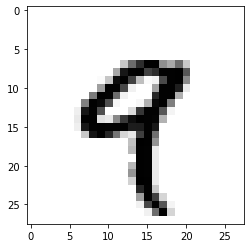

In [18]:
# 3D Tensor에서 5번째 샘플 확인
digit = train_images[4]
from matplotlib import pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [21]:
# numpy로 Tensor 조정
my_slice = train_images[10:100] # 11번째 ~ 101번째까지
print(my_slice.shape)

my_slice = train_images[10:100, :, :]
print(my_slice.shape)

my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


In [22]:
# 오른쪽 하단 14x14 픽셀 선택시
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

# 음수 index
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)

(60000, 14, 14)
(60000, 14, 14)


In [24]:
# 배치 데이터
# 일반적으로 딥러닝에서 사용하는 모든 데이터 Tensor의 첫 번째 축 == 샘플 축
# MNIST [0] == 숫자 이미지
# 딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다. 대신 데이터를 batch로 나눔.

batch_size = 128
batch_1 = train_images[:128]
batch_2 = train_images[128:256]
# batch_n = train_images[128 * n : 128 * (n+1)]

# 배치 데이터를 다룰 때는 첫 번째 축을 배치 축 또는 배치 차원이라고 부름.

In [25]:
# Tensor 실제사례
# 벡터 데이터 > (samples, features) 크기의 2D
# 시계열 데이터 또는 시퀀스 데이터 > (samples, timesteps, features) 크기의 3D 텐서
# 이미지 > (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
# 동영상 > (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

In [26]:
# 벡터 데이터
# 대부분의 경우 해당. 데이터셋에서는 하나의 데이터 포인트가 벡터로 인코딩 될 수 있으므로 배치 데이터는 2D 텐서로 인코딩.
# 첫 번째 축은 샘플 축, 두 번째 축은 특성 축

# 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터. 각 사람은 3개의 값을 가진 벡터로 구성, 10만 명이 포함된 전체 데이터셋은 (100000,3) 크기의 텐서에 저장될 수 있다.
# (공통 단어 2만 개로 만든 사전에서) 각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터셋. 각 문서는 2만 개의 원소(사전에 있는 단어마다 하나의 원소에 대응합니다.) 를 가진 벡터로 인코딩 될 수 있습니다.
# 500개의 문서로 이루어진 전체 데이터셋은 (500, 20000) 크기의 텐소로 저장.